$$
\bra{\psi}\mathrm{M}_1\ket{\psi} =\ \begin{pmatrix} \frac{i}{\sqrt{2}} & \frac{-i}{\sqrt{2}} \end{pmatrix}\begin{pmatrix} 1 & 0 \\ 0 & 0\end{pmatrix}\begin{pmatrix} \frac{-i}{\sqrt{2}} \\ \frac{i}{\sqrt{2}}\end{pmatrix}
$$

In [1]:
import sys
stdout = sys.stdout
import matplotlib
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
%matplotlib inline
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere

import warnings
warnings.simplefilter('ignore')

#fix output
sys.stdout = stdout
simulator = QasmSimulator()

In [2]:
def compile_circuit_and_measure(circuit, shots=10000):
    simulator = QasmSimulator()
    circuit.measure_all()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts(circuit)
    return counts

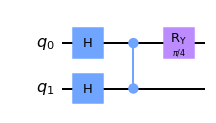

\documentclass[border=2px]{standalone}
        
\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document} 
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{ {q}_{0} :  } & \lstick{ {q}_{0} :  } & \gate{\mathrm{H}} & \ctrl{1} & \gate{\mathrm{R_Y}\,(\mathrm{\frac{\pi}{4}})} & \qw & \qw\\ 
	 	\nghost{ {q}_{1} :  } & \lstick{ {q}_{1} :  } & \gate{\mathrm{H}} & \control\qw & \qw & \qw & \qw\\ 
\\ }}
\end{document}


In [5]:
circuit = QuantumCircuit(2)
circuit.h(range(2))
circuit.cz(0,1)
circuit.ry(np.pi/4,0)
display(circuit.draw('mpl'))
print(circuit_drawer(circuit, output='latex_source'))
